<a href="https://colab.research.google.com/github/estella123wang/Dissertation2020/blob/master/groupsROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
!ls
os.chdir('/content/gdrive/My Drive/isotonic')
!ls

prot_denoised_new.csv
prot_denoised_new.csv


In [ ]:
import pandas as pd

In [ ]:
prot = pd.read_csv("prot_denoised_new.csv")

In [ ]:
prot.head()

,IL8,VEGFA,CD8A,MCP3,GDNF,CDCP1,CD244,IL7,OPG,LAPTGFbeta1,uPA,IL6,IL17C,MCP1,IL17A,CXCL11,AXIN1,TRAIL,IL20RA,CXCL9,CST5,IL2RB,IL1alpha,OSM,IL2,CXCL1,TSLP,CCL4,CD6,SCF,IL18,SLAMF1,TGFalpha,MCP4,CCL11,TNFSF14,FGF23,IL10RA,FGF5,MMP1,...,IL24,IL13,ARTN,MMP10,IL10,TNF,CCL23,CD5,CCL3,Flt3L,CXCL6,CXCL10,4EBP1,IL20,SIRT2,CCL28,DNER,ENRAGE,CD40,IL33,IFNgamma,FGF19,IL4,LIF,NRTN,MCP2,CASP8,CCL25,CX3CL1,TNFRSF9,NT3,TWEAK,CCL20,ST1A1,STAMBP,IL5,ADA,TNFB,CSF1,V93
0,2.758242,9.444567,11.981124,0.728349,1.537299,2.681866,6.161215,2.538895,9.449997,6.222941,9.679272,2.351369,2.253601,10.458604,2.165814,5.891125,2.403626,8.121508,1.125702,6.513704,5.183304,1.365232,-0.901252,2.701146,0.339682,8.586672,0.526972,5.979667,6.226187,8.326369,7.000284,1.270245,3.388866,11.537171,6.865506,2.325595,1.570493,0.768092,0.997905,8.790148,...,1.641415,0.392734,0.293791,9.794728,3.298922,1.960823,9.008995,5.223276,3.662406,9.029449,7.400224,6.838720,6.224946,0.109499,3.054099,1.975154,9.347680,3.370920,10.296784,0.321448,5.049591,8.594411,1.771567,-0.276177,0.485453,7.475356,1.925601,6.870474,5.246425,6.033119,2.540524,9.465616,6.220418,2.815468,4.067498,2.692409,5.364034,3.466267,9.278724,1
1,3.266772,10.262525,12.409942,1.780149,1.832103,3.157426,6.392277,1.968418,9.427887,7.140754,10.203353,3.078333,1.694064,11.438013,2.202042,7.096280,2.559479,8.465860,1.185656,6.874851,5.487011,2.261792,-0.689950,3.910078,0.591219,7.517659,0.806462,6.198513,5.226384,9.035190,7.912042,1.306306,3.334793,13.118912,7.500492,4.167993,1.903440,0.916333,1.098525,9.858970,...,2.327896,0.575778,1.002973,9.153564,3.807854,2.553969,9.997503,4.202366,4.500953,9.144654,8.157454,8.264642,6.057698,0.204929,2.761303,2.107306,9.367277,3.220158,10.330707,0.322325,6.338423,7.744694,1.616429,0.421646,0.491882,8.598200,1.316179,7.470985,5.963191,6.571437,3.084727,10.135323,6.325964,3.132781,4.228412,0.992485,5.869754,4.456117,9.502475,0
2,3.930862,9.676111,11.911512,1.802823,1.583962,2.532872,6.214591,1.831716,8.871841,6.829483,9.539816,2.849561,1.830516,11.452109,1.690613,6.798756,2.479646,8.250118,1.410290,6.391628,5.084122,1.197128,-1.022427,2.277046,0.303203,9.925939,1.360200,5.554740,4.941073,9.487867,7.870522,1.478361,2.935886,12.465075,7.157132,3.223537,1.729439,1.055882,0.982931,10.567035,...,1.656385,0.918464,0.826569,7.444054,3.411332,1.875369,9.110951,4.044519,4.125801,8.786326,7.737899,7.654499,6.879306,0.064713,2.776526,2.049667,9.376240,1.692236,9.964380,0.233162,5.667701,8.209896,1.505798,-0.198552,0.534316,8.298195,1.134138,6.515864,5.238669,6.026892,2.323564,9.674212,5.521315,2.627982,3.955337,0.684754,5.547892,3.656098,9.143695,1
3,2.301318,9.689564,11.483707,0.907778,1.021630,1.933929,6.276823,1.552968,8.971876,6.160183,9.623467,2.455609,1.945472,10.873567,1.773097,6.790597,1.807877,7.570924,1.099601,6.734201,5.087240,1.247461,-1.632691,2.470416,0.536205,6.517873,1.177989,5.932506,4.725663,8.818038,7.679107,1.082972,2.889134,12.574318,6.652048,2.948487,1.466678,0.555255,1.049467,8.359597,...,2.124000,0.332525,0.683999,8.333505,3.460365,2.050086,8.909076,3.546470,4.672334,8.217913,6.669576,7.787458,5.629277,0.461654,1.818191,1.974091,9.067867,1.729722,10.410903,0.650917,5.026999,9.555628,2.154086,-0.294244,0.459298,7.831853,0.859914,7.661587,6.074587,6.035937,3.024445,9.291374,5.276713,1.494218,3.212477,2.351477,5.157448,4.217224,9.450931,0
4,2.541252,9.372547,11.098468,1.758383,1.435940,2.519820,6.434382,1.586341,9.038821,6.406677,9.209139,2.274325,1.587984,10.835136,1.887951,6.033925,2.331862,7.457025,1.239266,6.805466,5.194811,1.462997,-0.964556,3.274755,0.303145,6.492330,0.480589,5.341624,5.728465,8.882772,7.282924,1.438876,4.171968,11.681019,6.618832,3.946741,1.760873,0.875102,0.976886,10.596800,...,1.837527,0.964195,0.298026,7.589902,3.434889,3.201029,8.824396,4.900864,4.060165,8.699038,6.392028,7.772045,6.089121,-0.039187,2.750151,1.844820,8.912334,1.598934,10.265414,0.335331,5.508668,7.965214,2.064840,-0.355257,0.363837,7.186636,1.538691,7.095192,5.693196,6.310232,

In [ ]:
X = prot.drop(prot.columns[len(prot.columns)-1],axis = 1)
y = prot.iloc[:,len(prot.columns)-1]

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: V93, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

#train:test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X.shape

(648, 92)

In [ ]:
y.shape

(648,)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
GNB_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators = 100)
logmodel = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5)
svmclf = svm.SVC()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "SVM": svmclf,
          "Bagging": bag_clf}

scores = {}

for key,value in models.items():
  model = value
  model.fit(X_train,y_train)
  scores[key] = 1-model.score(X_test, y_test)

scores_frame = pd.DataFrame(scores, index = ["Misclassification score"]).T
scores_frame

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Misclassification score
Gussian Naive Bayes,0.487179
Decision tree,0.430769
Random forest,0.441026
Logistic regression,0.394872
k-NN,0.523077
SVM,0.482051
Bagging,0.400000


Gussian Naive Bayes
Decision tree
Random forest
Logistic regression
k-NN


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Bagging


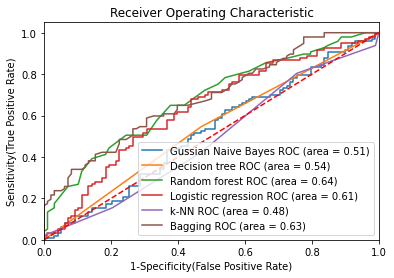

In [ ]:
plt.figure()

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "Bagging": bag_clf}

# Add the models to the list that you want to view on the ROC plot


# Below for loop iterates through your models list
for key,value in models.items():
    model = value # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(key)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))


# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
os.chdir('/content/gdrive/My Drive/9.6')
!ls

high_ttd.csv  low_ttd.csv  prot_denoised_new.csv


In [ ]:
high_ttd = pd.read_csv("high_ttd.csv")
high_ttd.head()

,Unnamed: 0,IL8,VEGFA,CD8A,MCP3,GDNF,CDCP1,CD244,IL7,OPG,LAPTGFbeta1,uPA,IL6,IL17C,MCP1,IL17A,CXCL11,AXIN1,TRAIL,IL20RA,CXCL9,CST5,IL2RB,IL1alpha,OSM,IL2,CXCL1,TSLP,CCL4,CD6,SCF,IL18,SLAMF1,TGFalpha,MCP4,CCL11,TNFSF14,FGF23,IL10RA,FGF5,...,CX3CL1,TNFRSF9,NT3,TWEAK,CCL20,ST1A1,STAMBP,IL5,ADA,TNFB,CSF1,V93,X,Indiv.ID,QC.Warning,storage_time,age.sample,gender,cohort,centre,case,id_match,smoking_status,tsq_smoking,smok_duration,smok_intensity,packyears,CSI,subtype,ttd,bmi,education_plco,Monocytes,B,CD4T,CD8T,NK,Eosinophils,Neutrophils,Gel.status
0,1,2.758242,9.444567,11.981124,0.728349,1.537299,2.681866,6.161215,2.538895,9.449997,6.222941,9.679272,2.351369,2.253601,10.458604,2.165814,5.891125,2.403626,8.121508,1.125702,6.513704,5.183304,1.365232,-0.901252,2.701146,0.339682,8.586672,0.526972,5.979667,6.226187,8.326369,7.000284,1.270245,3.388866,11.537171,6.865506,2.325595,1.570493,0.768092,0.997905,...,5.246425,6.033119,2.540524,9.465616,6.220418,2.815468,4.067498,2.692409,5.364034,3.466267,9.278724,1,2460807,2460807,Pass,20.624230,62,Female,EPIC,Turin,1,169_epic,Former,7.0,28.0,20.714286,29.00,1.651342,Large-cell carcinoma,13.659138,29.721079,1.0,0.060607,0.056068,0.080100,0.160866,0.000000e+00,8.849630e-20,0.676052,ok
1,8,6.667818,10.212907,12.238192,1.947294,1.230791,2.142718,7.008774,3.139656,9.055562,7.243303,9.799393,2.579067,1.829061,11.994617,3.952252,9.294670,5.716880,8.400209,0.930038,8.211206,5.185434,1.896006,-1.249240,4.322528,0.722361,10.856750,0.871409,6.449526,6.428296,9.317597,8.097354,1.361430,3.125938,14.449529,8.118351,5.191789,1.694439,0.955058,1.863745,...,5.786368,6.518868,2.558945,9.967636,5.933149,4.940090,8.828958,8.302852,8.070937,4.011247,9.491562,0,2100891,2100891,Pass,20.605065,50,Male,EPIC,Florence,1,194_epic,Current,0.0,35.0,9.428571,16.50,2.084549,Adenocarcinoma,8.208077,23.990110,2.0,0.076931,0.147987,0.071297,0.152307,3.894664e-02,0.000000e+00,0.526049,NaN
2,9,2.681059,10.051716,11.942742,1.273076,1.996219,2.376300,6.897260,2.386193,9.079825,7.295060,9.888642,2.488656,1.487357,10.708737,2.149134,8.020662,2.797021,8.055092,1.434488,6.948312,4.810919,1.507144,-1.192336,3.453357,0.370740,7.472659,0.749306,5.744790,5.179877,9.443665,7.925520,1.716149,2.952418,13.489048,7.547606,3.583141,1.775501,1.378151,1.171128,...,5.699936,6.471343,2.670365,9.870019,5.672661,2.732376,4.200458,1.034231,5.445647,4.907494,9.509348,0,2221350,2221350,Pass,20.292950,60,Female,EPIC,Varese,1,144_epic,Never,NaN,0.0,0.000000,0.00,0.000000,Large-cell carcinoma,9.086927,25.504392,2.0,0.037852,0.075076,0.112977,0.269520,1.805973e-02,0.000000e+00,0.499070,ok
3,14,3.598470,8.232882,8.913777,1.286662,-0.983602,2.653248,6.489665,1.211704,9.991364,6.317321,10.514153,2.504418,2.276906,10.310206,0.764756,6.540709,-1.883434,7.048030,1.301287,6.671795,5.290940,1.324512,2.328490,1.816732,-0.779592,6.922396,1.081014,5.168982,5.352063,9.524132,6.244916,1.513503,2.993688,12.449808,6.139027,3.711871,0.736781,0.876508,-0.984801,...,4.396508,5.998603,-0.016302,9.576264,4.516387,1.283680,3.511487,0.909595,5.879789,3.448079,7.306187,1,2461340,2461340,Pass,20.306639,55,Male,EPIC,Turin,1,65_epic,Current,0.0,37.0,11.621622,21.50,2.287538,Adenocarcinoma,11.594798,26.892323,1.0,0.061113,0.009215,0.018985,0.168674,-3.469447e-18,0.000000e+00,0.758483,NaN
4,21,4.461931,9.940963,12.134516,1.760138,1.253292,2.116157,6.585477,1.666087,9.186918,6.858606,9.936335,2.894189,1.801598,11.657461,2.576685,7.433098,2.857929,8.207892,1.744488,7.348109,5.179696,1.592393,-0.920454,4.246477,0.559567,7.591252,1.545521,5.965790,6.071647,9.225030,8.520570,1.550920,4.155626,13.141830,7.537307,4.881807,2.055954,0.862464,0.981667,...,6.073372,6.699279,3.383550,9.660808,6.198490,3.183560,4.978077,1.263332,5.912986,4.638910,9.479496,0,2221765,2221765,Pass,20.377823,58,Female,EPIC,Varese,1,145_epic,Former,8.0,30.0,14.500000,21.75,1.414462,Squamous-cell carcinoma,12.114990,26.370238,1.0,0.075076,0.043192,0.011271,0.208398,1.020240e-01,0.000000e+00,0.590584,ok


In [ ]:
high_ttd.shape

(161, 122)

In [ ]:
high_ttd.iloc[:,1:92]

,IL8,VEGFA,CD8A,MCP3,GDNF,CDCP1,CD244,IL7,OPG,LAPTGFbeta1,uPA,IL6,IL17C,MCP1,IL17A,CXCL11,AXIN1,TRAIL,IL20RA,CXCL9,CST5,IL2RB,IL1alpha,OSM,IL2,CXCL1,TSLP,CCL4,CD6,SCF,IL18,SLAMF1,TGFalpha,MCP4,CCL11,TNFSF14,FGF23,IL10RA,FGF5,MMP1,...,HGF,IL12B,IL24,IL13,ARTN,MMP10,IL10,TNF,CCL23,CD5,CCL3,Flt3L,CXCL6,CXCL10,X4EBP1,IL20,SIRT2,CCL28,DNER,ENRAGE,CD40,IL33,IFNgamma,FGF19,IL4,LIF,NRTN,MCP2,CASP8,CCL25,CX3CL1,TNFRSF9,NT3,TWEAK,CCL20,ST1A1,STAMBP,IL5,ADA,TNFB
0,2.758242,9.444567,11.981124,0.728349,1.537299,2.681866,6.161215,2.538895,9.449997,6.222941,9.679272,2.351369,2.253601,10.458604,2.165814,5.891125,2.403626,8.121508,1.125702,6.513704,5.183304,1.365232,-0.901252,2.701146,0.339682,8.586672,0.526972,5.979667,6.226187,8.326369,7.000284,1.270245,3.388866,11.537171,6.865506,2.325595,1.570493,0.768092,0.997905,8.790148,...,7.712124,4.746303,1.641415,0.392734,0.293791,9.794728,3.298922,1.960823,9.008995,5.223276,3.662406,9.029449,7.400224,6.838720,6.224946,0.109499,3.054099,1.975154,9.347680,3.370920,10.296784,0.321448,5.049591,8.594411,1.771567,-0.276177,0.485453,7.475356,1.925601,6.870474,5.246425,6.033119,2.540524,9.465616,6.220418,2.815468,4.067498,2.692409,5.364034,3.466267
1,6.667818,10.212907,12.238192,1.947294,1.230791,2.142718,7.008774,3.139656,9.055562,7.243303,9.799393,2.579067,1.829061,11.994617,3.952252,9.294670,5.716880,8.400209,0.930038,8.211206,5.185434,1.896006,-1.249240,4.322528,0.722361,10.856750,0.871409,6.449526,6.428296,9.317597,8.097354,1.361430,3.125938,14.449529,8.118351,5.191789,1.694439,0.955058,1.863745,11.559089,...,8.515967,4.389151,1.588818,0.814855,0.576071,7.536190,4.037621,2.414494,9.414161,4.971421,4.757727,8.724218,10.097232,9.374843,11.502262,0.370009,8.590805,2.653342,9.038275,6.164779,11.423045,0.700692,5.978816,10.059540,2.319016,0.089046,0.433878,9.222488,4.890506,7.617492,5.786368,6.518868,2.558945,9.967636,5.933149,4.940090,8.828958,8.302852,8.070937,4.011247
2,2.681059,10.051716,11.942742,1.273076,1.996219,2.376300,6.897260,2.386193,9.079825,7.295060,9.888642,2.488656,1.487357,10.708737,2.149134,8.020662,2.797021,8.055092,1.434488,6.948312,4.810919,1.507144,-1.192336,3.453357,0.370740,7.472659,0.749306,5.744790,5.179877,9.443665,7.925520,1.716149,2.952418,13.489048,7.547606,3.583141,1.775501,1.378151,1.171128,12.369070,...,7.796161,5.155441,1.864815,0.358166,0.648950,7.924586,3.757772,2.843530,9.513693,4.598023,4.145909,8.268282,7.956646,8.285054,6.796057,1.192341,2.512656,2.659372,9.419900,2.778232,10.317189,0.382988,6.483963,8.800858,2.438698,0.955691,0.497791,8.442140,1.282752,7.407864,5.699936,6.471343,2.670365,9.870019,5.672661,2.732376,4.200458,1.034231,5.445647,4.907494
3,3.598470,8.232882,8.913777,1.286662,-0.983602,2.653248,6.489665,1.211704,9.991364,6.317321,10.514153,2.504418,2.276906,10.310206,0.764756,6.540709,-1.883434,7.048030,1.301287,6.671795,5.290940,1.324512,2.328490,1.816732,-0.779592,6.922396,1.081014,5.168982,5.352063,9.524132,6.244916,1.513503,2.993688,12.449808,6.139027,3.711871,0.736781,0.876508,-0.984801,8.511064,...,7.507848,1.869905,5.102307,3.656757,-0.869597,8.159387,0.808286,0.197704,7.765553,4.260660,2.964917,6.960443,7.832696,7.528497,4.766541,0.205757,1.832517,1.706862,9.242416,5.101110,9.535099,-1.198756,6.117450,7.351358,3.724827,-0.009387,1.485981,8.103575,0.631948,5.694464,4.396508,5.998603,-0.016302,9.576264,4.516387,1.283680,3.511487,0.909595,5.879789,3.448079
4,4.461931,9.940963,12.134516,1.760138,1.253292,2.116157,6.585477,1.666087,9.186918,6.858606,9.936335,2.894189,1.801598,11.657461,2.576685,7.433098,2.857929,8.207892,1.744488,7.348109,5.179696,1.592393,-0.920454,4.246477,0.559567,7.591252,1.545521,5.965790,6.071647,9.225030,8.520570,1.550920,4.155626,13.141830,7.537307,4.881807,2.055954,0.862464,0.981667,9.752482,...,8.329936,5.571433,1.983519,0.305605,0.613024,8.126753,3.626846,2.609465,9.445374,4.932120,4.233403,8.845616,7.591673,8.572505,8.108067,0.299782,4.007349,2.227760,9.187401,4.270334,10.882356,0.300550,5.668738,7.234621,2.736588,0.272629,

In [ ]:
low_ttd.iloc[:,1:92]

,IL8,VEGFA,CD8A,MCP3,GDNF,CDCP1,CD244,IL7,OPG,LAPTGFbeta1,uPA,IL6,IL17C,MCP1,IL17A,CXCL11,AXIN1,TRAIL,IL20RA,CXCL9,CST5,IL2RB,IL1alpha,OSM,IL2,CXCL1,TSLP,CCL4,CD6,SCF,IL18,SLAMF1,TGFalpha,MCP4,CCL11,TNFSF14,FGF23,IL10RA,FGF5,MMP1,...,HGF,IL12B,IL24,IL13,ARTN,MMP10,IL10,TNF,CCL23,CD5,CCL3,Flt3L,CXCL6,CXCL10,X4EBP1,IL20,SIRT2,CCL28,DNER,ENRAGE,CD40,IL33,IFNgamma,FGF19,IL4,LIF,NRTN,MCP2,CASP8,CCL25,CX3CL1,TNFRSF9,NT3,TWEAK,CCL20,ST1A1,STAMBP,IL5,ADA,TNFB
0,2.758242,9.444567,11.981124,0.728349,1.537299,2.681866,6.161215,2.538895,9.449997,6.222941,9.679272,2.351369,2.253601,10.458604,2.165814,5.891125,2.403626,8.121508,1.125702,6.513704,5.183304,1.365232,-0.901252,2.701146,0.339682,8.586672,0.526972,5.979667,6.226187,8.326369,7.000284,1.270245,3.388866,11.537171,6.865506,2.325595,1.570493,0.768092,0.997905,8.790148,...,7.712124,4.746303,1.641415,0.392734,0.293791,9.794728,3.298922,1.960823,9.008995,5.223276,3.662406,9.029449,7.400224,6.838720,6.224946,0.109499,3.054099,1.975154,9.347680,3.370920,10.296784,0.321448,5.049591,8.594411,1.771567,-0.276177,0.485453,7.475356,1.925601,6.870474,5.246425,6.033119,2.540524,9.465616,6.220418,2.815468,4.067498,2.692409,5.364034,3.466267
1,6.667818,10.212907,12.238192,1.947294,1.230791,2.142718,7.008774,3.139656,9.055562,7.243303,9.799393,2.579067,1.829061,11.994617,3.952252,9.294670,5.716880,8.400209,0.930038,8.211206,5.185434,1.896006,-1.249240,4.322528,0.722361,10.856750,0.871409,6.449526,6.428296,9.317597,8.097354,1.361430,3.125938,14.449529,8.118351,5.191789,1.694439,0.955058,1.863745,11.559089,...,8.515967,4.389151,1.588818,0.814855,0.576071,7.536190,4.037621,2.414494,9.414161,4.971421,4.757727,8.724218,10.097232,9.374843,11.502262,0.370009,8.590805,2.653342,9.038275,6.164779,11.423045,0.700692,5.978816,10.059540,2.319016,0.089046,0.433878,9.222488,4.890506,7.617492,5.786368,6.518868,2.558945,9.967636,5.933149,4.940090,8.828958,8.302852,8.070937,4.011247
2,2.681059,10.051716,11.942742,1.273076,1.996219,2.376300,6.897260,2.386193,9.079825,7.295060,9.888642,2.488656,1.487357,10.708737,2.149134,8.020662,2.797021,8.055092,1.434488,6.948312,4.810919,1.507144,-1.192336,3.453357,0.370740,7.472659,0.749306,5.744790,5.179877,9.443665,7.925520,1.716149,2.952418,13.489048,7.547606,3.583141,1.775501,1.378151,1.171128,12.369070,...,7.796161,5.155441,1.864815,0.358166,0.648950,7.924586,3.757772,2.843530,9.513693,4.598023,4.145909,8.268282,7.956646,8.285054,6.796057,1.192341,2.512656,2.659372,9.419900,2.778232,10.317189,0.382988,6.483963,8.800858,2.438698,0.955691,0.497791,8.442140,1.282752,7.407864,5.699936,6.471343,2.670365,9.870019,5.672661,2.732376,4.200458,1.034231,5.445647,4.907494
3,3.598470,8.232882,8.913777,1.286662,-0.983602,2.653248,6.489665,1.211704,9.991364,6.317321,10.514153,2.504418,2.276906,10.310206,0.764756,6.540709,-1.883434,7.048030,1.301287,6.671795,5.290940,1.324512,2.328490,1.816732,-0.779592,6.922396,1.081014,5.168982,5.352063,9.524132,6.244916,1.513503,2.993688,12.449808,6.139027,3.711871,0.736781,0.876508,-0.984801,8.511064,...,7.507848,1.869905,5.102307,3.656757,-0.869597,8.159387,0.808286,0.197704,7.765553,4.260660,2.964917,6.960443,7.832696,7.528497,4.766541,0.205757,1.832517,1.706862,9.242416,5.101110,9.535099,-1.198756,6.117450,7.351358,3.724827,-0.009387,1.485981,8.103575,0.631948,5.694464,4.396508,5.998603,-0.016302,9.576264,4.516387,1.283680,3.511487,0.909595,5.879789,3.448079
4,4.461931,9.940963,12.134516,1.760138,1.253292,2.116157,6.585477,1.666087,9.186918,6.858606,9.936335,2.894189,1.801598,11.657461,2.576685,7.433098,2.857929,8.207892,1.744488,7.348109,5.179696,1.592393,-0.920454,4.246477,0.559567,7.591252,1.545521,5.965790,6.071647,9.225030,8.520570,1.550920,4.155626,13.141830,7.537307,4.881807,2.055954,0.862464,0.981667,9.752482,...,8.329936,5.571433,1.983519,0.305605,0.613024,8.126753,3.626846,2.609465,9.445374,4.932120,4.233403,8.845616,7.591673,8.572505,8.108067,0.299782,4.007349,2.227760,9.187401,4.270334,10.882356,0.300550,5.668738,7.234621,2.736588,0.272629,

In [ ]:
high_ttd = pd.read_csv("high_ttd.csv")

X = high_ttd.iloc[:,1:92]
y = high_ttd.iloc[:,93]

from sklearn.model_selection import train_test_split

#train:test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

GNB_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators = 100)
logmodel = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5)
svmclf = svm.SVC()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "SVM": svmclf,
          "Bagging": bag_clf}

scores = {}

for key,value in models.items():
  model = value
  model.fit(X_train,y_train)
  scores[key] = 1-model.score(X_test, y_test)

scores_frame = pd.DataFrame(scores, index = ["Misclassification score"]).T
scores_frame

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Misclassification score
Gussian Naive Bayes,0.408163
Decision tree,0.530612
Random forest,0.408163
Logistic regression,0.387755
k-NN,0.408163
SVM,0.428571
Bagging,0.428571


Gussian Naive Bayes
Decision tree
Random forest


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression
k-NN
Bagging


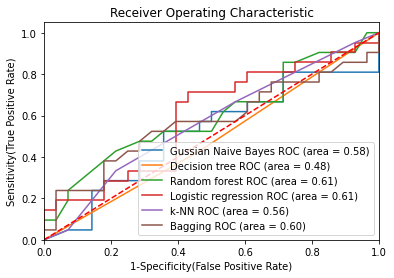

In [ ]:
plt.figure()

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "Bagging": bag_clf}

# Add the models to the list that you want to view on the ROC plot


# Below for loop iterates through your models list
for key,value in models.items():
    model = value # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(key)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))


# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
low_ttd = pd.read_csv("low_ttd.csv")

X = low_ttd.iloc[:,1:92]
y = low_ttd.iloc[:,93]

from sklearn.model_selection import train_test_split

#train:test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

GNB_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators = 100)
logmodel = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5)
svmclf = svm.SVC()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "SVM": svmclf,
          "Bagging": bag_clf}

scores = {}

for key,value in models.items():
  model = value
  model.fit(X_train,y_train)
  scores[key] = 1-model.score(X_test, y_test)

scores_frame = pd.DataFrame(scores, index = ["Misclassification score"]).T
scores_frame

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Misclassification score
Gussian Naive Bayes,0.489796
Decision tree,0.408163
Random forest,0.489796
Logistic regression,0.408163
k-NN,0.448980
SVM,0.571429
Bagging,0.530612


Gussian Naive Bayes
Decision tree
Random forest


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression
k-NN
Bagging


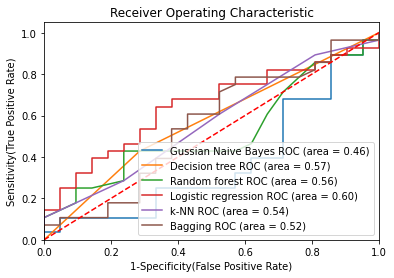

In [ ]:
plt.figure()

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "Bagging": bag_clf}

# Add the models to the list that you want to view on the ROC plot


# Below for loop iterates through your models list
for key,value in models.items():
    model = value # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(key)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))


# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

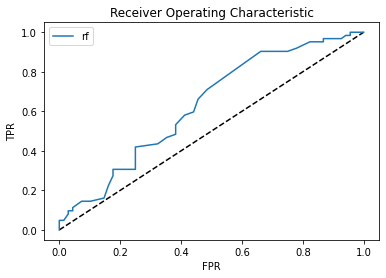

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = ran.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "rf")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
fpr1

array([0.        , 0.        , 0.        , 0.01470588, 0.02941176,
       0.02941176, 0.04411765, 0.04411765, 0.07352941, 0.10294118,
       0.14705882, 0.16176471, 0.17647059, 0.17647059, 0.25      ,
       0.25      , 0.32352941, 0.35294118, 0.38235294, 0.38235294,
       0.41176471, 0.44117647, 0.45588235, 0.48529412, 0.54411765,
       0.57352941, 0.66176471, 0.75      , 0.77941176, 0.82352941,
       0.86764706, 0.86764706, 0.89705882, 0.92647059, 0.94117647,
       0.95588235, 0.95588235, 1.        ])

In [ ]:
tpr1

array([0.        , 0.01612903, 0.0483871 , 0.0483871 , 0.08064516,
       0.09677419, 0.09677419, 0.11290323, 0.14516129, 0.14516129,
       0.16129032, 0.22580645, 0.27419355, 0.30645161, 0.30645161,
       0.41935484, 0.43548387, 0.46774194, 0.48387097, 0.53225806,
       0.58064516, 0.59677419, 0.66129032, 0.70967742, 0.77419355,
       0.80645161, 0.90322581, 0.90322581, 0.91935484, 0.9516129 ,
       0.9516129 , 0.96774194, 0.96774194, 0.96774194, 0.98387097,
       0.98387097, 1.        , 1.        ])

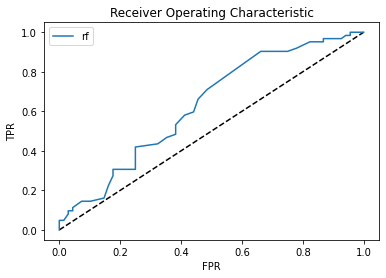

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
random_state = np.random.RandomState(0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

#ROC Curve
from sklearn.metrics import roc_curve
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "rf")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
fpr1

array([0.        , 0.        , 0.        , 0.01470588, 0.02941176,
       0.02941176, 0.04411765, 0.04411765, 0.07352941, 0.10294118,
       0.14705882, 0.16176471, 0.17647059, 0.17647059, 0.25      ,
       0.25      , 0.32352941, 0.35294118, 0.38235294, 0.38235294,
       0.41176471, 0.44117647, 0.45588235, 0.48529412, 0.54411765,
       0.57352941, 0.66176471, 0.75      , 0.77941176, 0.82352941,
       0.86764706, 0.86764706, 0.89705882, 0.92647059, 0.94117647,
       0.95588235, 0.95588235, 1.        ])

Bagging


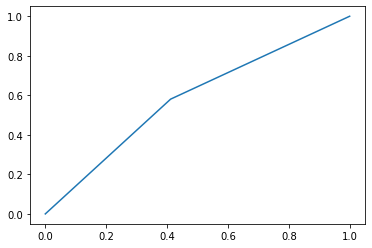

In [ ]:
    model = dt_clf # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(key)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))

In [ ]:
auc

0.5844402277039848

In [ ]:
fpr

array([0.        , 0.41176471, 1.        ])

In [ ]:
tpr

array([0.        , 0.58064516, 1.        ])

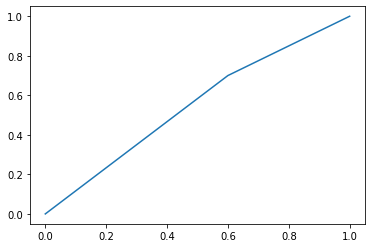

In [ ]:
plt.plot([0,0.6,1], [0, 0.7, 1], label='%s ROC (area = %0.2f)' % ("log", 0.7))